## Assignment on Clustering & SVM

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt 

### 1. Using the dataset “tips.csv” implement k-means clustering technique on two fields “total_bill”, “tip”.

Centroids:
 [[38.3725      4.78464286]
 [13.81042857  2.35742857]
 [23.94578947  3.52065789]]


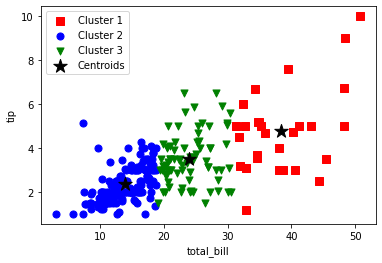

In [2]:
df = pd.read_csv("F:/BTech/ADV. PYTHON LAB/dataset/tips.csv")
x = df.iloc[:,[0,1]].values
km = KMeans(n_clusters=3)
km.fit(x)
y_pred = (km.fit_predict(x))
plt.scatter(x[y_pred==0,0], x[y_pred==0,1],s=50,c='red',marker='s',label='Cluster 1')
plt.scatter(x[y_pred==1,0], x[y_pred==1,1],s=50,c='blue',marker='o',label='Cluster 2')
plt.scatter(x[y_pred==2,0], x[y_pred==2,1],s=50,c='green',marker='v',label='Cluster 3')
print("Centroids:\n",km.cluster_centers_)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=200,
            marker='*',c='black',label='Centroids')
plt.legend()
plt.xlabel("total_bill")
plt.ylabel("tip")
plt.show()

Sum of Square Error:
 [19723.6765602459, 6760.722297459894, 3569.7865899347034, 2142.551598934399, 1464.637020575047, 1157.5320092488405, 919.9217452920514, 727.4918962828581, 622.595566794543]


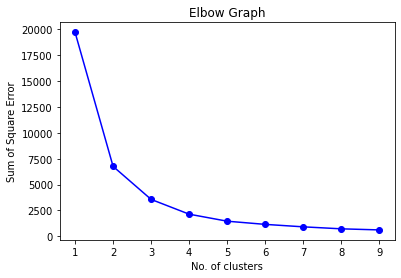

In [3]:
sse = []
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)
print("Sum of Square Error:\n",sse)
plt.plot(range(1,10),sse,marker='o',c='blue')
plt.title("Elbow Graph")
plt.xlabel("No. of clusters")
plt.ylabel("Sum of Square Error")
plt.show()

### 2. Use the data set “fruits.csv” and form SVM classification by taking weight and size as the parameter. If you take single parameters does the SVM technique differs? Justify.

In [4]:
df = pd.read_csv("F:/BTech/ADV. PYTHON LAB/dataset/fruits.csv",index_col=0)
x = df.iloc[:,[0,1]].values
y = df.iloc[:,2].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)
sts = StandardScaler()
x_train = sts.fit_transform(x_train)
x_test = sts.transform(x_test)
clf = SVC(kernel='rbf',random_state=0)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrx:\n",conf_mat)
print("Accuracy (%) = ",(accuracy_score(y_test,y_pred)) * 100)

Confusion Matrx:
 [[2 0]
 [0 3]]
Accuracy (%) =  100.0
